In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [2]:
df_8p5MID = pd.concat(map(pd.read_csv, glob.glob('/home/scratch/jcorner1/syn_sev/dataframes/MC8p5_UVV*')), ignore_index=True)

In [3]:
df_8p5MID = df_8p5MID[((df_8p5MID['DBZ'] >= 40.0) & (df_8p5MID['UVV'] >= 25.0))]
df_8p5MID['Time'] = pd.to_datetime(df_8p5MID['Time'])
df_8p5MID['Date'] = pd.to_datetime(df_8p5MID['Time']).dt.date
df_8p5MID['Day_of_Year'] = pd.to_datetime(df_8p5MID['Date']).dt.dayofyear
df_8p5MID['Month'] = pd.to_datetime(df_8p5MID['Time']).dt.month
df_8p5MID['Year'] = pd.to_datetime(df_8p5MID['Time']).dt.year
df_8p5MID

,Unnamed: 0,x,y,Time,UVV,DBZ,Date,Day_of_Year,Month,Year
19,19,570,206,2040-10-01 04:00:00,26.506720,41.974102,2040-10-01,275,10,2040
20,20,571,206,2040-10-01 04:00:00,28.058992,50.332855,2040-10-01,275,10,2040
21,21,572,206,2040-10-01 04:00:00,27.315520,52.738167,2040-10-01,275,10,2040
22,22,573,206,2040-10-01 04:00:00,26.366625,51.981960,2040-10-01,275,10,2040
23,23,574,206,2040-10-01 04:00:00,25.566341,50.218967,2040-10-01,275,10,2040
...,...,...,...,...,...,...,...,...,...,...
4796687,10675,838,673,2055-09-28 01:00:00,25.314558,47.214275,2055-09-28,271,9,2055
4796802,10790,924,712,2055-09-28 01:00:00,25.851837,45.725967,2055-09-28,271,9,2055
4796808,10796,943,714,2055-09-28 01:00:00,25.776848,53.437927,2055-09-28,271,9,2055
4797156,11144,865,600,2055-09-28 13:00:00,25.324047,45.770496,2055-09-28,271,9,2055


In [4]:
def Cumu_sum(df):

    daily_counts = pd.DataFrame(index=np.arange(1,366,1))
    df['Day_of_Year'] = pd.to_datetime(df['Date']).dt.dayofyear
    
    for year in df['Year'].unique()[:-1]:
        b=[]
        
        if year == np.min(df['Year'].unique()):
            df_year = df[((df['Year'] == np.min(df['Year'].unique())) | (df['Year'] == np.max(df['Year'].unique())))]
            
            for day in np.arange(1,366,1):
                df_sub = df_year[(df_year['Day_of_Year'] == day)]
                b.append(len(df_sub))
            
            
        else:
            df_year = df[(df['Year'] == year)]
            
            for day in np.arange(1,366,1):
                df_sub = df_year[(df_year['Day_of_Year'] == day)]
                b.append(len(df_sub))
            
        daily_counts[year] = b
            
    return daily_counts

In [5]:
new_df = Cumu_sum(df_8p5MID)

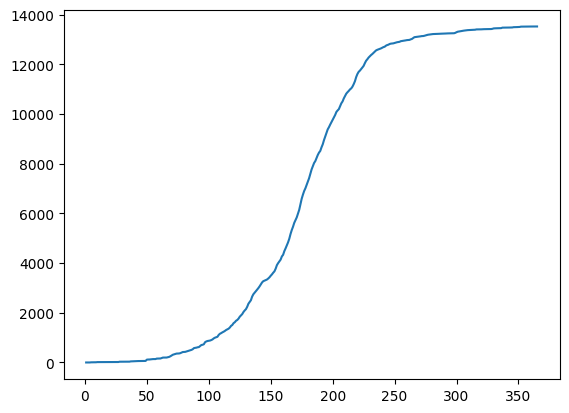

In [6]:
plt.plot(np.arange(1, 366, 1), np.cumsum(new_df.mean(axis = 1)))